In [1]:
import pandas as pd
import dask.dataframe as dd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import os
import random
import imageio.v3 as imageio
from PIL import Image
import torchvision.transforms as transforms
import skimage.exposure
from tiatoolbox.tools import stainnorm

/home/evos/miniconda/envs/tiatoolbox/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
|2025-01-20|19:03:05.855| [WARNING] /home/evos/miniconda/envs/tiatoolbox/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



In [2]:
FF_tiles_dir = "/home/evos/Outputs/CRC/FF/1_extract_histopathological_features/tiles_256um"
FFPE_tiles_dir = "/home/evos/Outputs/CRC/FFPE/1_extract_histopathological_features/tiles_256um"
orion_tiles_dir = "/home/evos/Outputs/CRC/Orion/Orion_tiles_256um_512pixels"

output_dir_plot = "/home/evos/figures/figures_preproc_scale_features"

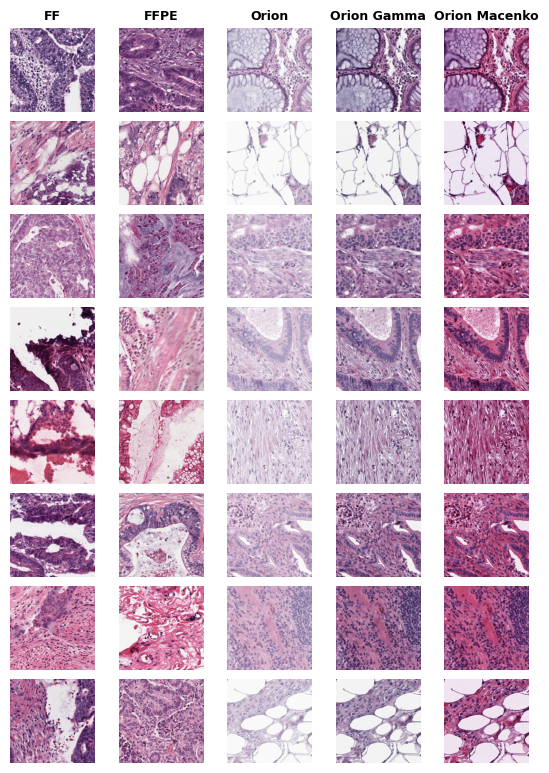

In [42]:
# Define directories for image tiles
FF_tiles_dir = "/home/evos/Outputs/CRC/FF/1_extract_histopathological_features/tiles_256um"
FFPE_tiles_dir = "/home/evos/Outputs/CRC/FFPE/1_extract_histopathological_features/tiles_256um"
orion_tiles_dir = "/home/evos/Outputs/CRC/Orion/Orion_tiles_256um_512pixels"

# Load target image for normalization
target_image_dir = "/home/evos/Data/CRC/normalization_template.jpg"
target_image = imageio.imread(target_image_dir)

# Initialize the stain normalizer and fit it on the target image
stain_normalizer = stainnorm.get_normalizer('Macenko')
stain_normalizer.fit(target_image)

# Randomly sample 6 images from each directory
FF_images = random.sample([os.path.join(FF_tiles_dir, f) for f in os.listdir(FF_tiles_dir) if f.endswith('.jpg')], 8)
FFPE_images = random.sample([os.path.join(FFPE_tiles_dir, f) for f in os.listdir(FFPE_tiles_dir) if f.endswith('.jpg')], 8)
orion_images = random.sample([os.path.join(orion_tiles_dir, f) for f in os.listdir(orion_tiles_dir) if f.endswith('.jpg')], 8)

# Define function to normalize an image using stainnorm (Macenko)
def normalize_image(image_path, stain_normalizer):
    image = imageio.imread(image_path)
    normalized_image = stain_normalizer.transform(image)
    return normalized_image

# Normalize the sampled Orion images using Macenko
macenko_orion_images = [normalize_image(img, stain_normalizer) for img in orion_images]

# Define function to apply gamma correction
def gamma_correct_image(image_path, gamma=2.2):
    image = imageio.imread(image_path)
    corrected_image = skimage.exposure.adjust_gamma(image, gamma)
    return corrected_image

# Apply gamma correction to the Orion images
gamma_corrected_orion_images = [gamma_correct_image(img, gamma=2.2) for img in orion_images]

# Combine all sampled images into separate lists for each column
columns = [FF_images, FFPE_images, orion_images, gamma_corrected_orion_images, macenko_orion_images]
column_titles = ["FF", "FFPE", "Orion", "Orion Gamma", "Orion Macenko"]

# Plot images in a 6x5 grid (6 rows, 5 columns)
fig, axes = plt.subplots(8, 5, figsize=(15, 15))  # 6 rows, 5 columns
fig.subplots_adjust(top=0.6, left=0.05, right=0.4, hspace=0.1, wspace=0.2)  # Adjust spacing between rows and columns

# Add column titles
for col_idx, title in enumerate(column_titles):
    axes[0, col_idx].set_title(title, fontsize=9, weight='bold')

# Plot images in the grid
for col_idx, image_list in enumerate(columns):
    for row_idx, img_data in enumerate(image_list):
        ax = axes[row_idx, col_idx]
        if col_idx == 3:  # For the gamma-corrected Orion column
            ax.imshow(img_data)
        elif col_idx == 4:  # For the Macenko-normalized Orion column
            ax.imshow(img_data)
        else:  # For the original image columns
            img = Image.open(img_data)
            ax.imshow(img)
        ax.axis('off')

# Hide any unused subplots (not necessary here since we are using exactly 30 images)
#plt.tight_layout(pad=0.5)  # Adjust this value if necessary
plt.savefig(f"{output_dir_plot}/example_tiles.png", bbox_inches='tight', dpi=300) 
plt.show()
plt.close()  


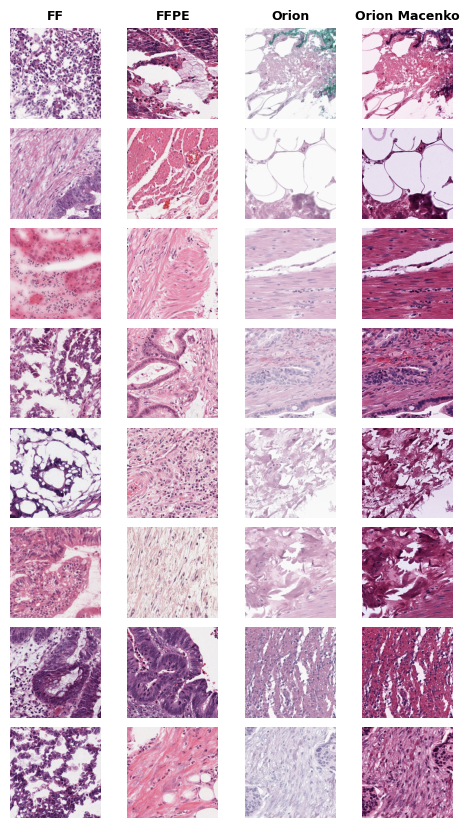

In [77]:
# Define directories for image tiles
FF_tiles_dir = "/home/evos/Outputs/CRC/FF/1_extract_histopathological_features/tiles_256um"
FFPE_tiles_dir = "/home/evos/Outputs/CRC/FFPE/1_extract_histopathological_features/tiles_256um"
orion_tiles_dir = "/home/evos/Outputs/CRC/Orion/Orion_tiles_256um_512pixels"

# Load target image for normalization
target_image_dir = "/home/evos/Data/CRC/normalization_template.jpg"
target_image = imageio.imread(target_image_dir)

# Initialize the stain normalizer and fit it on the target image
stain_normalizer = stainnorm.get_normalizer('Macenko')
stain_normalizer.fit(target_image)

# Randomly sample 6 images from each directory
FF_images = random.sample([os.path.join(FF_tiles_dir, f) for f in os.listdir(FF_tiles_dir) if f.endswith('.jpg')], 8)
FFPE_images = random.sample([os.path.join(FFPE_tiles_dir, f) for f in os.listdir(FFPE_tiles_dir) if f.endswith('.jpg')], 8)
orion_images = random.sample([os.path.join(orion_tiles_dir, f) for f in os.listdir(orion_tiles_dir) if f.endswith('.jpg')], 8)

# Define function to normalize an image using stainnorm (Macenko)
def normalize_image(image_path, stain_normalizer):
    image = imageio.imread(image_path)
    normalized_image = stain_normalizer.transform(image)
    return normalized_image

# Normalize the sampled Orion images using Macenko
macenko_orion_images = [normalize_image(img, stain_normalizer) for img in orion_images]

# Define function to apply gamma correction
def gamma_correct_image(image_path, gamma=2.2):
    image = imageio.imread(image_path)
    corrected_image = skimage.exposure.adjust_gamma(image, gamma)
    return corrected_image

# Apply gamma correction to the Orion images
gamma_corrected_orion_images = [gamma_correct_image(img, gamma=2.2) for img in orion_images]

# Modify the columns and titles to remove gamma-corrected images
columns = [FF_images, FFPE_images, orion_images, macenko_orion_images]
column_titles = ["FF", "FFPE", "Orion", "Orion Macenko"]

# Plot images in a 8x4 grid (8 rows, 4 columns)
fig, axes = plt.subplots(8, 4, figsize=(5,10))  # 8 rows, 4 columns (instead of 5)
fig.subplots_adjust(top=0.9, left=0.05, right=0.95, hspace=0.1, wspace=0.2)  # Adjust spacing

# Add column titles
for col_idx, title in enumerate(column_titles):
    axes[0, col_idx].set_title(title, fontsize=9, weight='bold')

# Plot images in the grid
for col_idx, image_list in enumerate(columns):
    for row_idx, img_data in enumerate(image_list):
        ax = axes[row_idx, col_idx]
        if col_idx == 3:  # For the Macenko-normalized Orion column
            ax.imshow(img_data)
        else:  # For the original image columns
            img = Image.open(img_data)
            ax.imshow(img)
        ax.axis('off')

# Save the plot
plt.savefig(f"{output_dir_plot}/example_tiles.png", bbox_inches='tight', dpi=300) 
plt.show()
plt.close()

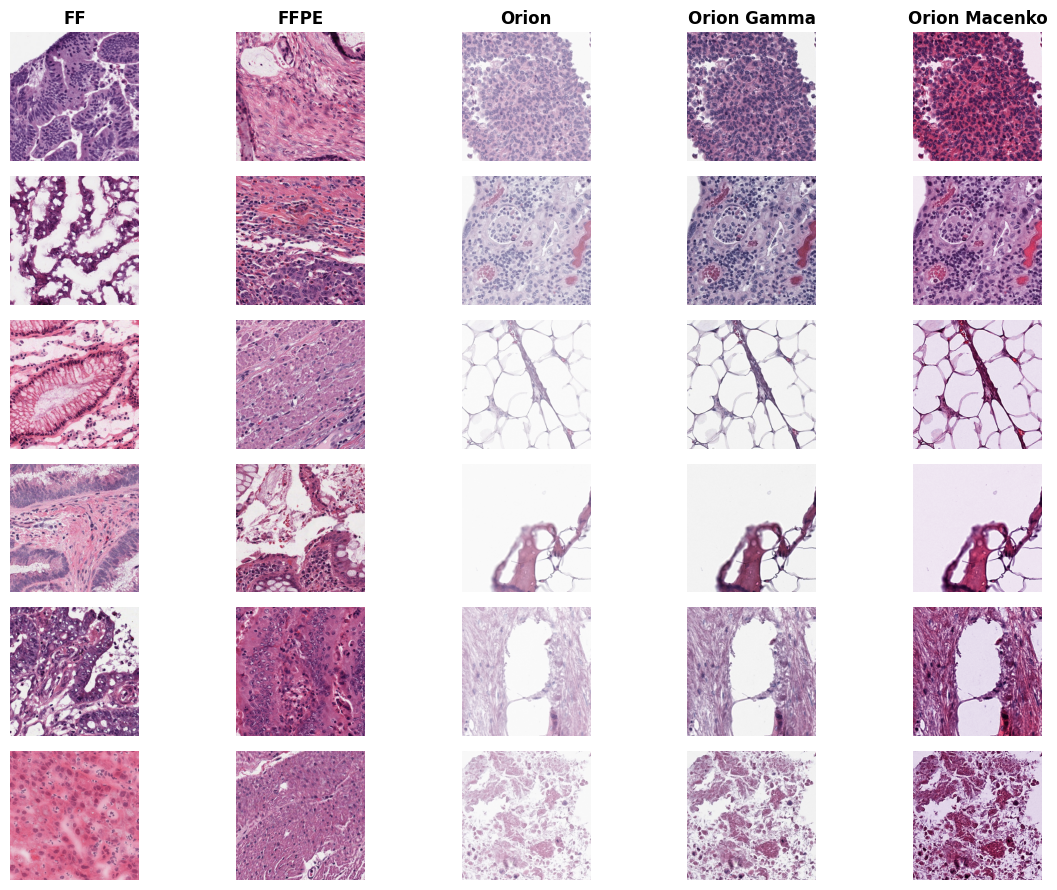

In [14]:
# Define directories for image tiles
FF_tiles_dir = "/home/evos/Outputs/CRC/FF/1_extract_histopathological_features/tiles_256um"
FFPE_tiles_dir = "/home/evos/Outputs/CRC/FFPE/1_extract_histopathological_features/tiles_256um"
orion_tiles_dir = "/home/evos/Outputs/CRC/Orion/Orion_tiles_256um_512pixels"

# Load target image for normalization
target_image_dir = "/home/evos/Data/CRC/normalization_template.jpg"
target_image = imageio.imread(target_image_dir)

# Initialize the stain normalizer and fit it on the target image
stain_normalizer = stainnorm.get_normalizer('Macenko')
stain_normalizer.fit(target_image)

# Randomly sample 6 images from each directory
FF_images = random.sample([os.path.join(FF_tiles_dir, f) for f in os.listdir(FF_tiles_dir) if f.endswith('.jpg')], 6)
FFPE_images = random.sample([os.path.join(FFPE_tiles_dir, f) for f in os.listdir(FFPE_tiles_dir) if f.endswith('.jpg')], 6)
orion_images = random.sample([os.path.join(orion_tiles_dir, f) for f in os.listdir(orion_tiles_dir) if f.endswith('.jpg')], 6)

# Define function to normalize an image using stainnorm (Macenko)
def normalize_image(image_path, stain_normalizer):
    image = imageio.imread(image_path)
    normalized_image = stain_normalizer.transform(image)
    return normalized_image

# Normalize the sampled Orion images using Macenko
macenko_orion_images = [normalize_image(img, stain_normalizer) for img in orion_images]

# Define function to apply gamma correction
def gamma_correct_image(image_path, gamma=2.2):
    image = imageio.imread(image_path)
    corrected_image = skimage.exposure.adjust_gamma(image, gamma)
    return corrected_image

# Apply gamma correction to the Orion images
gamma_corrected_orion_images = [gamma_correct_image(img, gamma=2.2) for img in orion_images]

# Combine all sampled images into separate lists for each column
columns = [FF_images, FFPE_images, orion_images, gamma_corrected_orion_images, macenko_orion_images]
column_titles = ["FF", "FFPE", "Orion", "Orion Gamma", "Orion Macenko"]

# Plot images in a 6x5 grid (6 rows, 5 columns)
fig, axes = plt.subplots(6, 5, figsize=(12, 9))  # 6 rows, 5 columns
fig.subplots_adjust(top=0.92)  # Leave space for column titles

# Add column titles
for col_idx, title in enumerate(column_titles):
    axes[0, col_idx].set_title(title, fontsize=10, weight='bold')

# Plot images in the grid
for col_idx, image_list in enumerate(columns):
    for row_idx, img_data in enumerate(image_list):
        ax = axes[row_idx, col_idx]
        if col_idx == 3:  # For the gamma-corrected Orion column
            ax.imshow(img_data)
        elif col_idx == 4:  # For the Macenko-normalized Orion column
            ax.imshow(img_data)
        else:  # For the original image columns
            img = Image.open(img_data)
            ax.imshow(img)
        ax.axis('off')

# Hide any unused subplots (not necessary here since we are using exactly 30 images)
plt.tight_layout()
plt.show()


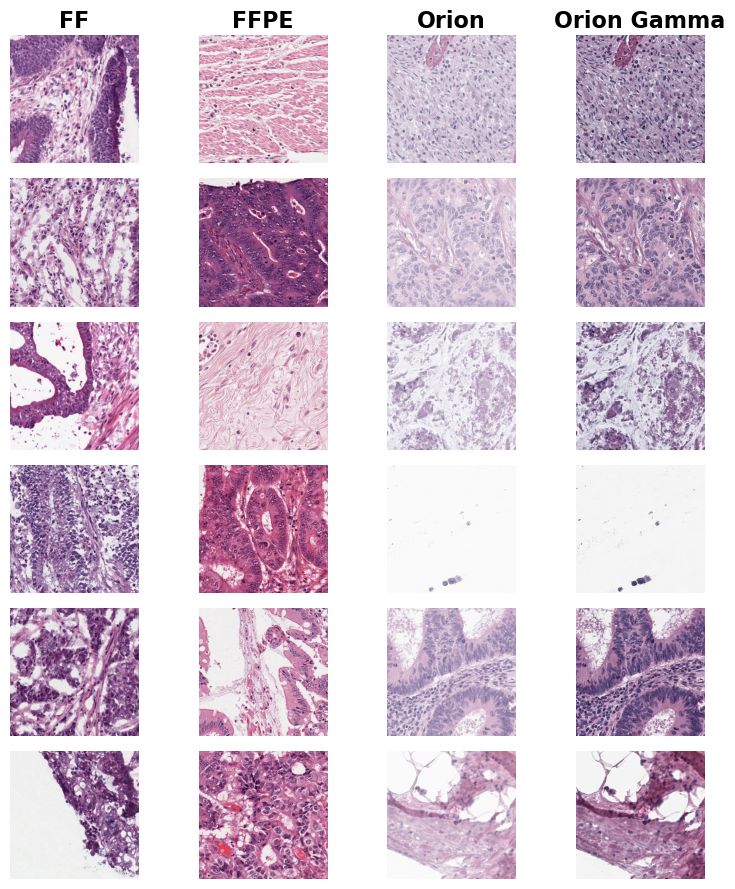

In [10]:
# Randomly sample 6 images from each directory
FF_images = random.sample([os.path.join(FF_tiles_dir, f) for f in os.listdir(FF_tiles_dir) if f.endswith('.jpg')], 6)
FFPE_images = random.sample([os.path.join(FFPE_tiles_dir, f) for f in os.listdir(FFPE_tiles_dir) if f.endswith('.jpg')], 6)
orion_images = random.sample([os.path.join(orion_tiles_dir, f) for f in os.listdir(orion_tiles_dir) if f.endswith('.jpg')], 6)

# Create gamma-corrected versions of Orion images
gamma_corrected_orion = []
for img_path in orion_images:
    img = Image.open(img_path)
    img_array = transforms.ToTensor()(img)  # Convert to tensor
    gamma_corrected = skimage.exposure.adjust_gamma(img_array.numpy(), 2.2)  # Apply gamma correction
    gamma_corrected_orion.append(gamma_corrected.transpose(1, 2, 0))  # Convert to HWC format for plotting

# Combine all sampled images into separate lists for each column
columns = [FF_images, FFPE_images, orion_images, gamma_corrected_orion]
column_titles = ["FF", "FFPE", "Orion", "Orion Gamma"]

# Plot images in a 6x4 grid
fig, axes = plt.subplots(6, 4, figsize=(8, 9))  # 6 rows, 4 columns
fig.subplots_adjust(top=0.92)  # Leave space for column titles

# Add column titles
for col_idx, title in enumerate(column_titles):
    axes[0, col_idx].set_title(title, fontsize=16, weight='bold')

# Plot images in the grid
for col_idx, image_list in enumerate(columns):
    for row_idx, img_data in enumerate(image_list):
        ax = axes[row_idx, col_idx]
        if col_idx == 3:  # For the gamma-corrected Orion column
            ax.imshow(img_data)
        else:  # For the original image columns
            img = Image.open(img_data)
            ax.imshow(img)
        ax.axis('off')

# Hide any unused subplots (not necessary here since we are using exactly 24 images)
plt.tight_layout()
plt.show()